In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [36]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(64,(4,4),padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(4,4),
    my_conv_layer(64,(4,4)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    my_dense_layer(256),
    my_dense_layer(84),
    my_dense_layer(10, activation="softmax")
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 52s 945us/sample - loss: 0.6464 - accuracy: 0.7683 - val_loss: 0.4169 - val_accuracy: 0.8484
Epoch 2/10
 7296/55000 [==>...........................] - ETA: 48s - loss: 0.4482 - accuracy: 0.8484

KeyboardInterrupt: 

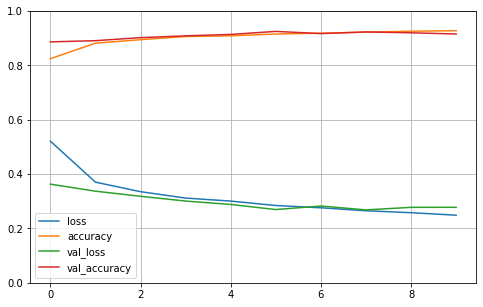

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5192    0   47   49    6    0  238    0   11    0]
 [   0 5410    0   21    8    0    1    0    4    0]
 [  63    0 4747   20  524    0  140    0    2    0]
 [  68    9   11 5199  184    0   24    0    4    0]
 [   6    2   60   39 5303    0  101    0    1    0]
 [   0    0    1    0    0 5473    1    7    5   20]
 [ 523    2  185   59  376    0 4350    0   12    0]
 [   0    0    0    0    0   25    0 5433    4   26]
 [   3    0    1    2    5    0    1    0 5498    0]
 [   0    0    0    0    0    3    0  202    3 5286]]


In [23]:
model.evaluate(X_test,y_test) 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2947038229227066, 0.913]

In [25]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[898   0   9  11   5   0  72   0   5   0]
 [  3 982   0   9   2   0   2   0   2   0]
 [ 20   0 820   7 108   0  45   0   0   0]
 [ 18   1   7 904  43   0  23   0   4   0]
 [  1   1  19  11 935   0  32   0   1   0]
 [  1   0   0   0   0 988   0   2   1   8]
 [129   0  61  22  96   0 684   0   8   0]
 [  0   0   0   0   0   9   0 982   1   8]
 [  2   1   2   4   3   1   1   0 986   0]
 [  1   0   0   0   0   5   0  43   0 951]]


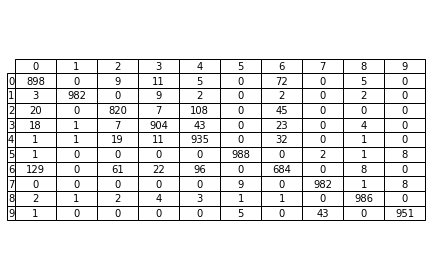

In [26]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')